In [32]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [33]:
DATADIR="G:/Brain/brain_tumor_dataset"
CATEGORIES=["No","Yes"]
IMG_SIZE=70
training_data=[]
median_filter1=[]

0


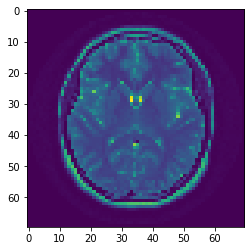

0


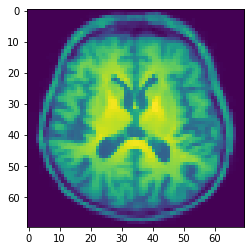

0


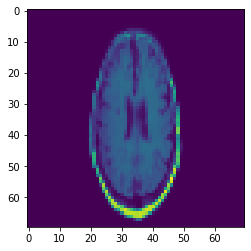

0


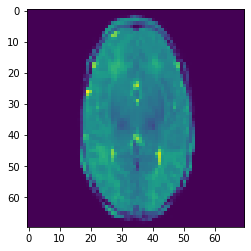

0


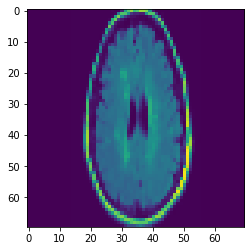

0


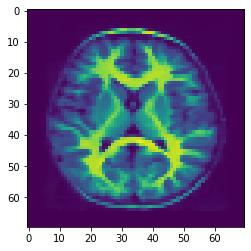

0


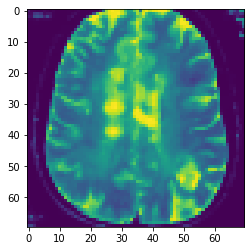

0


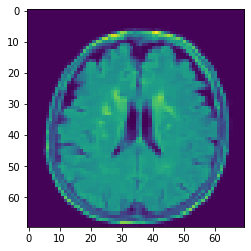

0


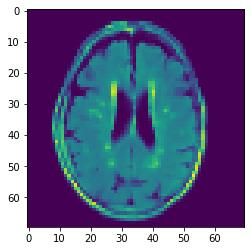

0


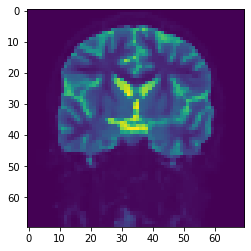

In [34]:
def create_training():
    for category in  CATEGORIES:
        path = os.path.join(DATADIR,category)      
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img1=np.array(img_array)
                median_filter=cv2.medianBlur(img1,5)
                median_resize=cv2.resize(median_filter,(IMG_SIZE,IMG_SIZE))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                median_filter1.append([median_resize,class_num])
            except Exception as e:
                pass
               
create_training()
for sample in median_filter1[ :10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()
       

In [35]:
import random
random.shuffle(training_data)

1


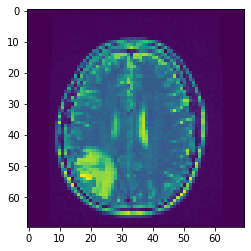

1


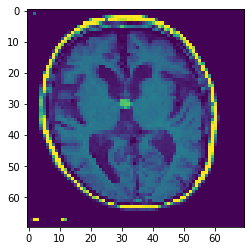

1


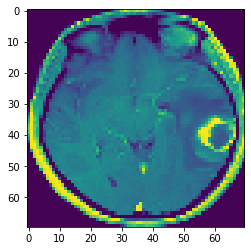

0


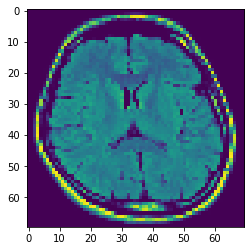

1


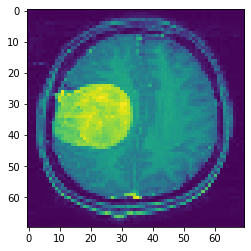

1


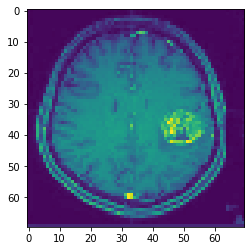

1


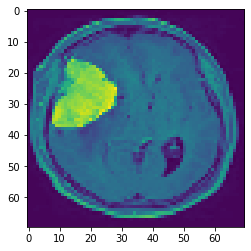

1


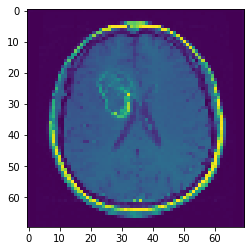

0


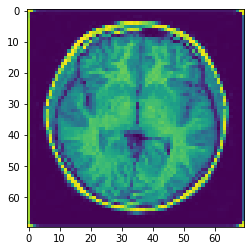

1


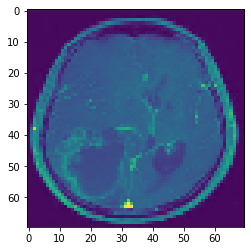

In [36]:
for sample in training_data[ :10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()

In [37]:
X=[]
y=[]


for features,labels in training_data:

    X.append(features)
    y.append(labels)

In [38]:
X=np.array(X).reshape(-1,70,70,1)
y=np.array(y).reshape(-1,1)
np.ndim(X)


4

In [39]:
print(X.shape)
print(y.shape)


(253, 70, 70, 1)
(253, 1)


In [40]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
y=np.array(y)
X=X/255.0
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(70,70,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(X,y,epochs=15,batch_size=32,validation_split=0.1)
model.save("brain-model")

Epoch 1/15
8/8 [==============================] - 2s 262ms/step - loss: 0.6422 - accuracy: 0.6300 - val_loss: 0.5199 - val_accuracy: 0.7308
Epoch 2/15
8/8 [==============================] - 2s 218ms/step - loss: 0.5644 - accuracy: 0.7004 - val_loss: 0.4207 - val_accuracy: 0.9615
Epoch 3/15
8/8 [==============================] - 2s 224ms/step - loss: 0.5417 - accuracy: 0.7445 - val_loss: 0.4213 - val_accuracy: 0.7692
Epoch 4/15
8/8 [==============================] - 2s 220ms/step - loss: 0.5064 - accuracy: 0.7577 - val_loss: 0.4143 - val_accuracy: 0.9231
Epoch 5/15
8/8 [==============================] - 2s 218ms/step - loss: 0.4887 - accuracy: 0.7930 - val_loss: 0.3851 - val_accuracy: 0.7692
Epoch 6/15
8/8 [==============================] - 2s 222ms/step - loss: 0.4510 - accuracy: 0.8062 - val_loss: 0.3956 - val_accuracy: 0.7692
Epoch 7/15
8/8 [==============================] - 2s 216ms/step - loss: 0.4158 - accuracy: 0.8414 - val_loss: 0.3287 - val_accuracy: 0.9231
Epoch 8/15
8/8 [====

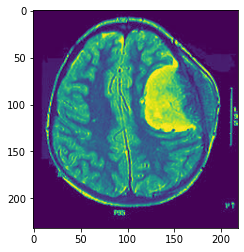

Tumor chances of % 100


In [47]:
import cv2
import tensorflow 

CATEGORIES=["No","Yes"]

def prepare(filepath):
        img_arr=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        new_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        plt.imshow(img_arr)
        plt.show()
        return new_arr.reshape(-1,IMG_SIZE,IMG_SIZE,1)
#model=tf.keras.models.load_model("brain-model")
prediction=model.predict([prepare("G:/TRAINING_EXAMPLE/t2_brain.jpg")])
if(prediction>0.75):
    print("Tumor chances of %",int(prediction*100))
else:
    print("No Tumor")

